In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
import seaborn as sns #visualizations
import matplotlib.pyplot as plt #visualizations
import re #cleaning

import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
nltk.download()

import matplotlib.pyplot as plt
%matplotlib inline


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [68]:
trainingset = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1')
print(trainingset.tail())
list(trainingset.columns.values)

         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
1599994  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
1599994  AmandaMarie1028   
1599995      TheWDBoards   
1599996           bpbabe   
1599997     tinydiamondz   
1599998   RyanTrevMorris   

        @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
1599994  Just woke up. Having no school is the best fee...                                                                   
1599995  TheWDB.com - Very cool to hear old Walt interv...                                                                   
1599996  Are you ready for your MoJo Makeover? Ask me f.

['0',
 '1467810369',
 'Mon Apr 06 22:19:45 PDT 2009',
 'NO_QUERY',
 '_TheSpecialOne_',
 "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]

In [70]:
trainingset.columns = ['sentiment', 'id', 'time', 'query', 'user', 'text']

In [71]:
data = trainingset.copy()            

data['text'] = data['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
data['text'] = data['text'].apply(lambda x: re.sub('  ', ' ', x))

data['sentiment'] = data['sentiment'].map({0: 0, 4: 1})

print(data.head()) 

   sentiment          id                          time     query  \
0          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   

            user                                               text  
0  scotthamilton  is upset that he can't update his facebook by ...  
1       mattycus  kenichan i dived many times for the ball manag...  
2        ElleCTF    my whole body feels itchy and like its on fire   
3         Karoli  nationwideclass no it's not behaving at all i'...  
4       joy_wolf                       kwesidei not the whole crew   


In [72]:
data = data[['text','sentiment']] #dropping unnecessary columns
print(data.head())
print(data['sentiment'].nunique()) #checking that there are no neutral sentiments

                                                text  sentiment
0  is upset that he can't update his facebook by ...          0
1  kenichan i dived many times for the ball manag...          0
2    my whole body feels itchy and like its on fire           0
3  nationwideclass no it's not behaving at all i'...          0
4                       kwesidei not the whole crew           0
2


In [73]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
print(train.info())

y = data.sentiment
X = data.text

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size=.02)

x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, 
                                                              y_validation_and_test, test_size=.5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439999 entries, 56193 to 1372913
Data columns (total 2 columns):
text         1439999 non-null object
sentiment    1439999 non-null int64
dtypes: int64(1), object(1)
memory usage: 33.0+ MB
None


In [7]:
train_pos = train[ train['sentiment'] == 1]
train_pos = train_pos["text"]
train_neg = train[ train['sentiment'] == 0]
train_neg = train_neg['text']

train_neg.head()

780041                         hmpf i miss michael so much 
57239                       inflicted with paranoiawaaaaaa 
341819                                 is still recovering 
689233    damn i made a cup of tea but just remembered i...
701314    chloemichelle15 yeah i know i want a milk shak...
Name: text, dtype: object

In [14]:
np.sum(data.isnull().any(axis=1)) #checking that there are no null values

0

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(data.text)
len(cvec.get_feature_names()) #number of feature extracted from training data

809705

In [21]:
neg_doc_matrix = cvec.transform(data[data.sentiment == 0].text)
pos_doc_matrix = cvec.transform(data[data.sentiment == 4].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [28]:
print(term_freq_df.sort_values(1, ascending=False).head(50))

             0       1
the     256473  264212
to      312816  252220
you     102373  195291
and     151319  147462
it      154281  144618
my      189282  125171
for      98728  117064
is      127655  108459
in      114927  100539
of       92647   90970
on       83765   83738
that     81777   81790
me       90401   70118
with     49944   64983
so       86905   64154
have     82518   62102
just     63224   61948
good     28690   61033
be       58448   54223
at       62124   49268
http     24263   47053
love     16708   46962
but      81364   46278
day      38897   46260
was      59052   45144
your     20786   44314
are      33904   43853
this     52161   40979
all      41610   40876
can      51537   40829
up       48899   40680
now      50719   39807
out      43367   37915
like     40747   37241
get      45404   36255
we       28001   34423
thanks    5621   33743
lol      21726   33600
not      73686   32970
do       35293   31048
going    33472   30678
time     26973   29631
what     28

In [30]:
print(term_freq_df.sort_values(0, ascending=False).head(50))

             0       1
to      312816  252220
the     256473  264212
my      189282  125171
it      154281  144618
and     151319  147462
is      127655  108459
in      114927  100539
you     102373  195291
for      98728  117064
of       92647   90970
me       90401   70118
so       86905   64154
on       83765   83738
have     82518   62102
that     81777   81790
but      81364   46278
not      73686   32970
just     63224   61948
at       62124   49268
was      59052   45144
be       58448   54223
no       52629   21638
this     52161   40979
can      51537   40829
now      50719   39807
with     49944   64983
up       48899   40680
get      45404   36255
go       45218   27911
work     44257   18942
out      43367   37915
all      41610   40876
like     40747   37241
day      38897   46260
today    36744   29054
too      36676   27616
do       35293   31048
are      33904   43853
going    33472   30678
got      33010   27791
back     32663   23556
don      32481   16843
really   31

In [31]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,312816,252220,565036
the,256473,264212,520685
my,189282,125171,314453
it,154281,144618,298899
and,151319,147462,298781
you,102373,195291,297664
is,127655,108459,236114
for,98728,117064,215792
in,114927,100539,215466
of,92647,90970,183617


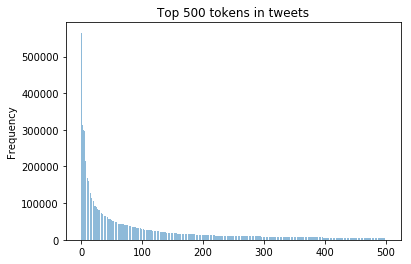

In [40]:
y_pos = np.arange(500)
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')
plt.show()

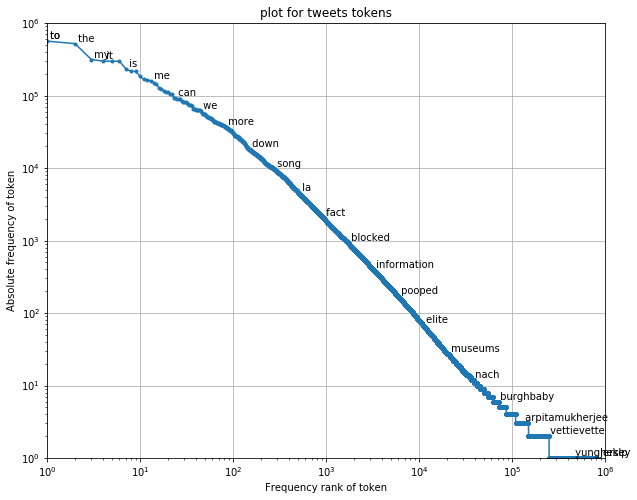

In [52]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(10,8))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
title("plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [63]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
